<a href="https://colab.research.google.com/github/Malek1Alk7alil2/Quiz1/blob/main/Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('/content/adult.csv')
data.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  classification_report, ConfusionMatrixDisplay

In [ ]:
data['interaction_Education Num_Hours/Week'] = data['Education Num'] * data['Hours/Week']
data['interaction_Education Num_Age'] = data['Education Num'] * data['Age']

In [ ]:
'''features = ['interaction_Education Num_Hours/Week','interaction_Education Num_Age', 'Capital Gain']'''
features = ['interaction_Education Num_Hours/Week', 'interaction_Education Num_Age', 'Capital Gain', 'fnlgwt']
x = data.drop('Above/Below 50k', axis=1)
y = data['Above/Below 50k']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle = True)

print(f"Data size: {len(x)}\nTraining data size: {len(x_train)}\nTesting data size: {len(x_test)}")

Data size: 32561
Training data size: 26048
Testing data size: 6513


In [ ]:
# preprocessing
scaler = StandardScaler()

# Select only numerical features for scaling
numerical_features = x_train.select_dtypes(include=['number']).columns

# Fit and transform on numerical features only
x_train_transformed = scaler.fit_transform(x_train[numerical_features])
x_test_transformed = scaler.transform(x_test[numerical_features])

In [ ]:
lr = LogisticRegression(multi_class='multinomial')
lr.fit(x_train_transformed, y_train)
y_hat_lr = lr.predict(x_test_transformed)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:

acc = accuracy_score(y_test, y_hat_lr)
print(f"Model accuracy was {acc*100:.2f}%")

report = classification_report(y_test, y_hat_lr)
print(report)

Model accuracy was 81.36%
              precision    recall  f1-score   support

       <=50K       0.83      0.95      0.89      4925
        >50K       0.72      0.38      0.50      1588

    accuracy                           0.81      6513
   macro avg       0.78      0.67      0.69      6513
weighted avg       0.80      0.81      0.79      6513



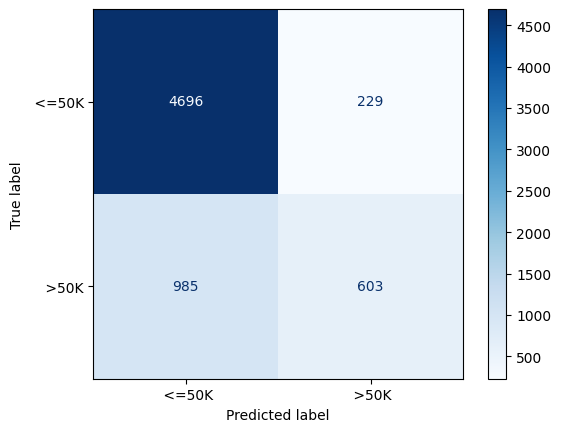

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_lr, cmap=plt.cm.Blues)
plt.show()